In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as py
import plotly.graph_objs as go

import seaborn as sns 
from scipy.stats import multivariate_normal
import random as rnd
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from sklearn.metrics import confusion_matrix

import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve

import pandas as pd
import numpy as np
from numpy import genfromtxt
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")



In [3]:
df_insurance = pd.read_csv("C://Users//eddie//Desktop//Ironhack//MY PROJECTS//health insurance comparisons//BenefitsCostSharing.csv")

In [4]:
df_insurance.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,Explanation,ImportDate,IsCovered,IsEHB,IsExclFromInnMOOP,IsExclFromOonMOOP,IsStateMandate,IsSubjToDedTier1,IsSubjToDedTier2,IssuerId,IssuerId2,LimitQty,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,Combined annual benefit maximum of $1000 per y...,2014-03-19 07:06:49,Covered,NaN,No,No,NaN,No,No,21989,21989,1000.0,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,NaN,No,No,21989,21989,1.0,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,NaN,Yes,Yes,21989,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,"24 month waiting period, See policy for additi...",2014-03-19 07:06:49,Covered,NaN,No,No,NaN,Yes,Yes,21989,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,NaN,Yes,Yes,21989,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


In [6]:
df_insurance.shape

(5048408, 32)

# how many nulls

In [5]:
df_insurance.isnull().sum()

BenefitName                  0
BusinessYear                 0
CoinsInnTier1          1113847
CoinsInnTier2          4571587
CoinsOutofNet          1113847
CopayInnTier1          1113847
CopayInnTier2          4571587
CopayOutofNet          1113849
EHBVarReason           3020737
Exclusions             4572247
Explanation            4075700
ImportDate                   0
IsCovered               215980
IsEHB                  1817362
IsExclFromInnMOOP       983986
IsExclFromOonMOOP       982626
IsStateMandate         4250463
IsSubjToDedTier1       2465877
IsSubjToDedTier2       2466054
IssuerId                     0
IssuerId2                    0
LimitQty               4360725
LimitUnit              4360539
MinimumStay            5031681
PlanId                       0
QuantLimitOnSvc        3264532
RowNumber                    0
SourceName                   0
StandardComponentId          0
StateCode                    0
StateCode2                   0
VersionNum                   0
dtype: i

# column names

In [8]:
df_insurance.columns

Index(['BenefitName', 'BusinessYear', 'CoinsInnTier1', 'CoinsInnTier2',
       'CoinsOutofNet', 'CopayInnTier1', 'CopayInnTier2', 'CopayOutofNet',
       'EHBVarReason', 'Exclusions', 'Explanation', 'ImportDate', 'IsCovered',
       'IsEHB', 'IsExclFromInnMOOP', 'IsExclFromOonMOOP', 'IsStateMandate',
       'IsSubjToDedTier1', 'IsSubjToDedTier2', 'IssuerId', 'IssuerId2',
       'LimitQty', 'LimitUnit', 'MinimumStay', 'PlanId', 'QuantLimitOnSvc',
       'RowNumber', 'SourceName', 'StandardComponentId', 'StateCode',
       'StateCode2', 'VersionNum'],
      dtype='object')

In [9]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048408 entries, 0 to 5048407
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   BenefitName          object 
 1   BusinessYear         int64  
 2   CoinsInnTier1        object 
 3   CoinsInnTier2        object 
 4   CoinsOutofNet        object 
 5   CopayInnTier1        object 
 6   CopayInnTier2        object 
 7   CopayOutofNet        object 
 8   EHBVarReason         object 
 9   Exclusions           object 
 10  Explanation          object 
 11  ImportDate           object 
 12  IsCovered            object 
 13  IsEHB                object 
 14  IsExclFromInnMOOP    object 
 15  IsExclFromOonMOOP    object 
 16  IsStateMandate       object 
 17  IsSubjToDedTier1     object 
 18  IsSubjToDedTier2     object 
 19  IssuerId             int64  
 20  IssuerId2            int64  
 21  LimitQty             float64
 22  LimitUnit            object 
 23  MinimumStay          float64
 24

# change columns to lowercase

In [10]:
df_insurance.columns = [columns.lower().replace(' ', '_') for columns in df_insurance.columns]  
df_insurance.columns

Index(['benefitname', 'businessyear', 'coinsinntier1', 'coinsinntier2',
       'coinsoutofnet', 'copayinntier1', 'copayinntier2', 'copayoutofnet',
       'ehbvarreason', 'exclusions', 'explanation', 'importdate', 'iscovered',
       'isehb', 'isexclfrominnmoop', 'isexclfromoonmoop', 'isstatemandate',
       'issubjtodedtier1', 'issubjtodedtier2', 'issuerid', 'issuerid2',
       'limitqty', 'limitunit', 'minimumstay', 'planid', 'quantlimitonsvc',
       'rownumber', 'sourcename', 'standardcomponentid', 'statecode',
       'statecode2', 'versionnum'],
      dtype='object')

# how much data is filled in each column 

In [11]:
(df_insurance.count()/len(df_insurance))*100

benefitname            100.000000
businessyear           100.000000
coinsinntier1           77.936668
coinsinntier2            9.444978
coinsoutofnet           77.936668
copayinntier1           77.936668
copayinntier2            9.444978
copayoutofnet           77.936629
ehbvarreason            40.164563
exclusions               9.431904
explanation             19.267619
importdate             100.000000
iscovered               95.721820
isehb                   64.001285
isexclfrominnmoop       80.508984
isexclfromoonmoop       80.535923
isstatemandate          15.805874
issubjtodedtier1        51.155354
issubjtodedtier2        51.151848
issuerid               100.000000
issuerid2              100.000000
limitqty                13.621779
limitunit               13.625464
minimumstay              0.331332
planid                 100.000000
quantlimitonsvc         35.335417
rownumber              100.000000
sourcename             100.000000
standardcomponentid    100.000000
statecode     

# describing the data 

In [12]:
def df_values(df_insurance):
    for i in range(0, len(df_insurance.columns)):
        print('----------', df_insurance.columns[i], '---------')
        print (df_insurance.iloc[:,i].value_counts())
        print ('----------', df_insurance.columns[i], '---------- \n')
df_values(df_insurance)    

---------- benefitname ---------
Orthodontia - Adult                   77377
Routine Dental Services (Adult)       77353
Basic Dental Care - Adult             77353
Accidental Dental                     77353
Major Dental Care - Adult             77353
                                      ...  
Posterior Composites - Child              1
Implant Adult                             1
Prefab Resin Crown                        1
Vital pulpotomy                           1
root Canal Therapy and Retreatment        1
Name: benefitname, Length: 861, dtype: int64
---------- benefitname ---------- 

---------- businessyear ---------
2015    2079286
2016    1804253
2014    1164869
Name: businessyear, dtype: int64
---------- businessyear ---------- 

---------- coinsinntier1 ---------
20% Coinsurance after deductible    673204
No Charge                           665749
0%                                  624803
No Charge after deductible          392355
30% Coinsurance after deductible    335056


# describe statistics

In [13]:
df_insurance.describe()

,businessyear,issuerid,issuerid2,limitqty,minimumstay,rownumber,versionnum
count,5.048408e+06,5.048408e+06,5.048408e+06,687683.000000,16727.000000,5.048408e+06,5.048408e+06
mean,2.015127e+03,5.220360e+04,5.220360e+04,142.399374,47.937048,9.839018e+01,7.637094e+00
std,7.563664e-01,2.592498e+04,2.592498e+04,1723.372817,5.892297,2.177890e+01,3.803627e+00
min,2.014000e+03,1.004600e+04,1.004600e+04,1.000000,5.000000,6.100000e+01,1.000000e+00
25%,2.015000e+03,3.253600e+04,3.253600e+04,1.000000,48.000000,8.000000e+01,5.000000e+00
50%,2.015000e+03,4.839600e+04,4.839600e+04,20.000000,48.000000,9.900000e+01,7.000000e+00
75%,2.016000e+03,7.498000e+04,7.498000e+04,40.000000,48.000000,1.170000e+02,9.000000e+00
max,2.016000e+03,9.996900e+04,9.996900e+04,75000.000000,90.000000,1.560000e+02,2.400000e+01


# let's look at the benefit types in each year

In [15]:
df_insurance[["businessyear","benefitname"]].groupby('businessyear').describe()

benefitname                                               
                   count unique                              top   freq
businessyear                                                           
2014             1164869    496  Routine Dental Services (Adult)  18719
2015             2079286    517              Orthodontia - Adult  31269
2016             1804253    429              Orthodontia - Adult  27389

# let's look at the benefits for each state

In [16]:
df_insurance[["statecode","benefitname"]].groupby('statecode').count().sort_values("benefitname")
unique_st = df_insurance.statecode.unique()
benefits = []

for state in unique_st:
    st_benefit =  len(df_insurance[df_insurance["statecode"] == state])    
    benefits.append(st_benefit)   

# graph which state has the most benefits

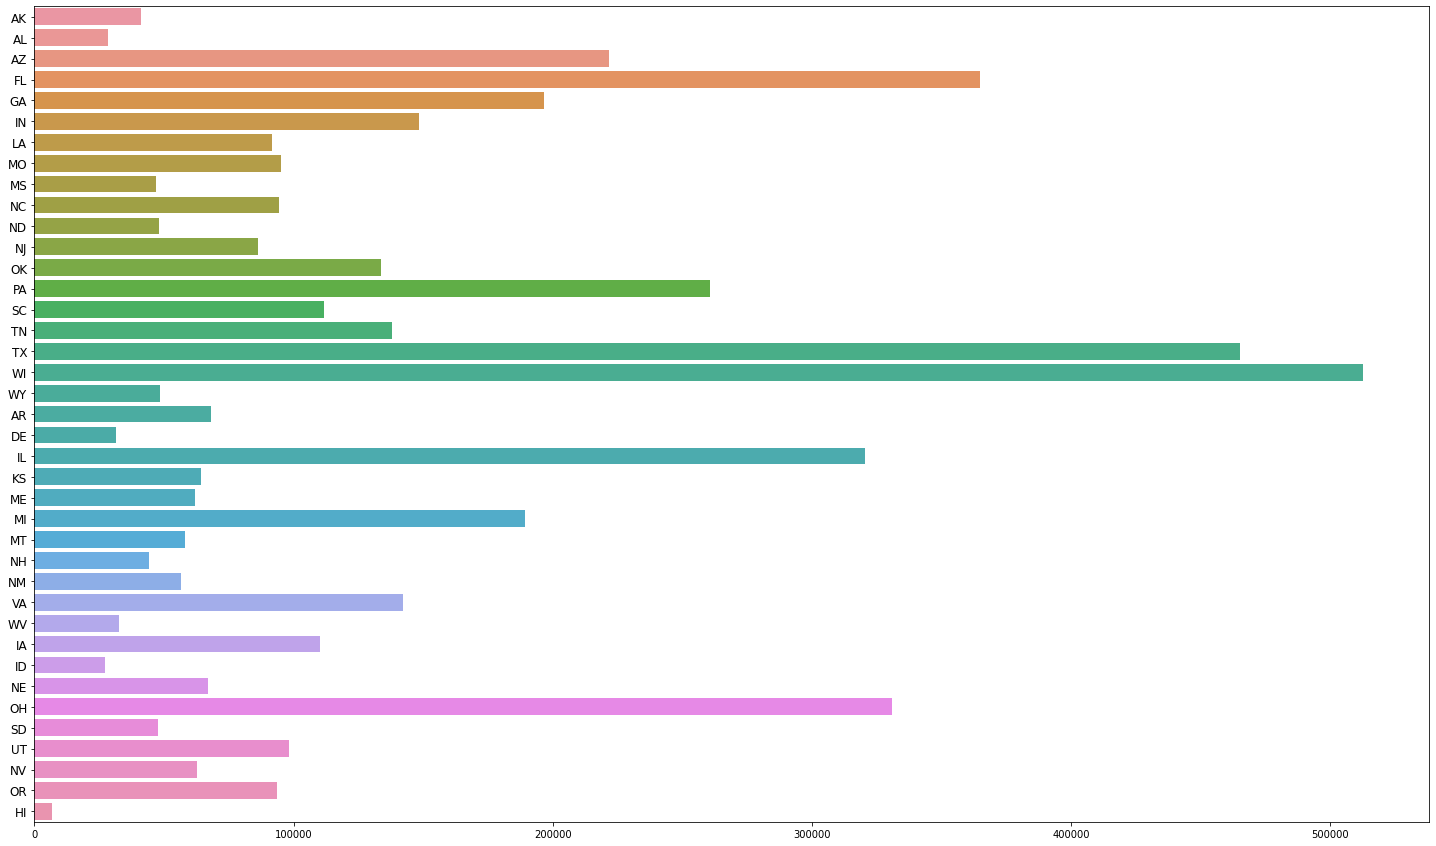

In [19]:
f, ax = plt.subplots(figsize=(25, 15)) 
ax.set_yticklabels(unique_st, rotation='horizontal', fontsize='large')
g = sns.barplot(y = unique_st,x=benefits)
plt.show()

# same graph but with states sorted alphabetically

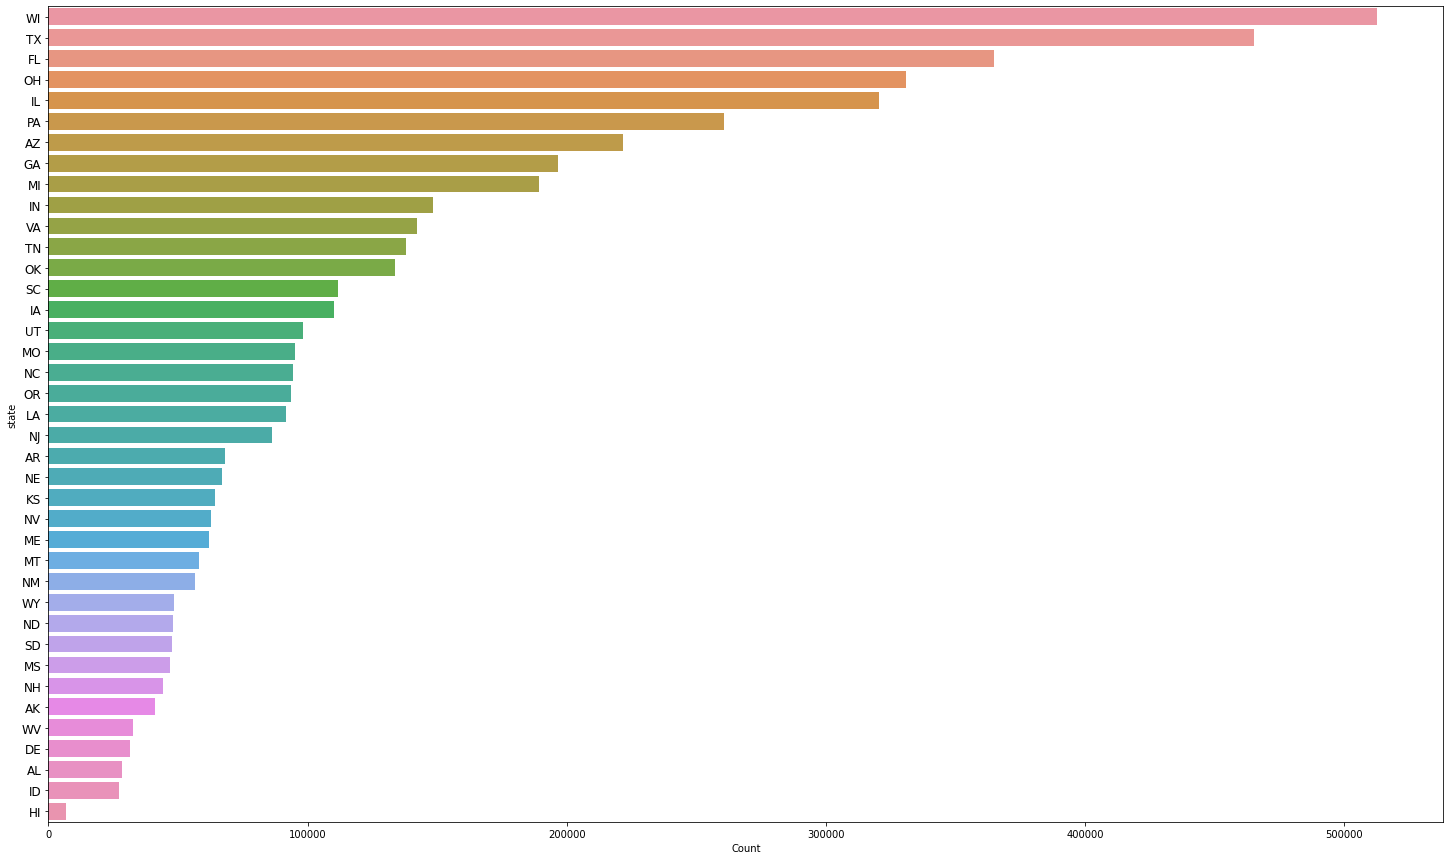

In [31]:
df = pd.DataFrame({'state': unique_st, 'Count' : benefits})
df = df.sort_values("Count", ascending=False).reset_index(drop=True)
f, ax = plt.subplots(figsize=(25, 15)) 
ax.set_yticklabels(df.state, rotation='horizontal', fontsize='large')
g = sns.barplot(y = df.state, x= df.Count)
plt.show()

# let's see this data on a map

In [37]:
data = dict(type = 'choropleth',
           locations = df['state'],
           locationmode = 'USA-states',
           colorscale = 'algae',
            text = df['state'],
            marker = dict (line = dict(color = 'rgb(255,255,255)',width=2)),
           z = df['Count'],
           colorbar = {'title':'number of benefit plans'})

layout = dict(title = 'benefit plans per state',
         geo=dict(scope = 'usa',showlakes = True,lakecolor='rgb(85,173,240)')) 

choromap2 = go.Figure(data = [data],layout=layout)
iplot(choromap2)

# let's look at the population in each state

In [38]:
df_insurance[["statecode","benefitname"]].groupby('statecode').describe()

benefitname                                              
                count unique                              top  freq
statecode                                                          
AK              41320     84  Routine Dental Services (Adult)   720
AL              28417    115  Routine Dental Services (Adult)   653
AR              68064     93              Orthodontia - Adult  1077
AZ             221612    195        Major Dental Care - Adult  3345
DE              31370    110              Orthodontia - Adult   602
FL             364742    194              Orthodontia - Child  5130
GA             196579    151  Routine Dental Services (Adult)  2893
HI               6741     76  Routine Dental Services (Adult)   110
IA             110221    104     Dental Check-Up for Children  1727
ID              27313     71     Dental Check-Up for Children   447
IL             320533    157              Orthodontia - Adult  4299
IN             148531    109        Major Dental Care - Adult  2347
KS              64279     82     Dental Check-Up for Children  1087
LA              91816    125  Routine Dental Services (Adult)  1491
ME              61834     99        Basic Dental Care - Child   975
MI             189225    205        Basic Dental Care - Child  3248
MO              95152    127              Orthodontia - Child  1577
MS              46895    104        Basic Dental Care - Adult   725
MT              58132     75        Basic Dental Care - Child  1049
NC              94290     98        Major Dental Care - Adult  1537
ND              48269     77                Accidental Dental   974
NE              66935     90        Major Dental Care - Adult  1238
NH              44305     98        Major Dental Care - Adult   707
NJ              86107    100              Orthodontia - Adult  1357
NM              56669     78              Orthodontia - Adult   828
NV              62743    121     Dental Check-Up for Children   930
OH             331045    193     Dental Check-Up for Children  5092
OK             133639     83        Major Dental Care - Adult  2136
OR              93502    123              Orthodontia - Adult  1344
PA             260866    157  Routine Dental Services (Adult)  4208
SC             111907     85              Orthodontia - Child  1817
SD              47730     79              Orthodontia - Adult   843
TN             138154    129        Basic Dental Care - Adult  2073
TX             465164    180                Accidental Dental  6441
UT              98421    101        Major Dental Care - Adult  1527
VA             142236    145                Accidental Dental  2256
WI             512587    146        Basic Dental Care - Adult  7135
WV              32638     77        Basic Dental Care - Child   625
WY              48425     92     Dental Check-Up for Children   807

# let's revisit the dataset and zoom in on some columns

In [47]:
benifits_imp = df_insurance[['planid','benefitname','businessyear','exclusions','explanation','importdate','iscovered','issuerid','limitqty','limitunit','minimumstay','sourcename','statecode']]

# let's look at exclusions

In [49]:
(benifits_imp.isnull().sum()/len(benifits_imp))*100

planid           0.000000
benefitname      0.000000
businessyear     0.000000
exclusions      90.568096
explanation     80.732381
importdate       0.000000
iscovered        4.278180
issuerid         0.000000
limitqty        86.378221
limitunit       86.374536
minimumstay     99.668668
sourcename       0.000000
statecode        0.000000
dtype: float64

In [50]:
benifits_imp[benifits_imp['exclusions'].notnull()]

,planid,benefitname,businessyear,exclusions,explanation,importdate,iscovered,issuerid,limitqty,limitunit,minimumstay,sourcename,statecode
55,38536AK0010002-00,Accidental Dental,2014,Damage resulting from chewing or biting food o...,Family Plan,2013-08-01 12:48:00,Covered,38536,NaN,NaN,NaN,HIOS,AK
146,38536AK0010001-00,Accidental Dental,2014,Damage resulting from chewing or biting food o...,Family Plan,2013-08-01 12:48:00,Covered,38536,NaN,NaN,NaN,HIOS,AK
158,38536AK0010003-00,Accidental Dental,2014,Damage resulting from chewing or biting food o...,Family Plan,2013-08-01 12:48:00,Covered,38536,NaN,NaN,NaN,HIOS,AK
6396,44580AL0360002-03,Infertility Treatment,2014,"Excludes Assistive Reproductive Technology, A...","Coverage up to the diagnosis only, treatment i...",2014-01-21 08:29:49,Covered,44580,NaN,NaN,NaN,HIOS,AL
6441,44580AL0360002-00,Infertility Treatment,2014,"Excludes Assistive Reproductive Technology, A...","Coverage up to the diagnosis only, treatment i...",2014-01-21 08:29:49,Covered,44580,NaN,NaN,NaN,HIOS,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5048183,63300WV0040002-00,Orthodontia - Child,2016,24 month elimination period for ortho benefit,No services for ortho until on the plan for 2 ...,2015-08-20 12:28:36,Covered,63300,NaN,NaN,NaN,SERFF,WV
5048192,67072WV0030001-00,Orthodontia - Child,2016,24 month elimination period for ortho benefit,No services for ortho until on the plan for 2 ...,2015-08-20 12:28:36,Covered,67072,NaN,NaN,NaN,SERFF,WV
5048201,67072WV0030002-00,Orthodontia - Child,2016,24 month elimination period for ortho benefit,No services for ortho until on the plan for 2 ...,2015-08-20 12:28:36,Covered,67072,NaN,NaN,NaN,SERFF,WV
5048210,67072WV0040001-00,Orthodontia - Child,2016,24 month elimination period for ortho benefit,No services for ortho until on the plan for 2 ...,2015-08-20 12:28:36,Covered,67072,NaN,NaN,NaN,SERFF,WV


# I decided to drop some columns with a large amount of null values

In [52]:
benifits_imp = benifits_imp.drop(['exclusions','limitqty','minimumstay','limitunit','explanation'],axis=1)

In [53]:
(benifits_imp.isnull().sum()/len(benifits_imp))*100

planid          0.00000
benefitname     0.00000
businessyear    0.00000
importdate      0.00000
iscovered       4.27818
issuerid        0.00000
sourcename      0.00000
statecode       0.00000
dtype: float64

In [54]:
benifits_imp = benifits_imp.dropna()

In [55]:
(benifits_imp.isnull().sum()/len(benifits_imp))*100

planid          0.0
benefitname     0.0
businessyear    0.0
importdate      0.0
iscovered       0.0
issuerid        0.0
sourcename      0.0
statecode       0.0
dtype: float64

# let's take a look at the Rates dataset

In [57]:
df_rate = pd.read_csv("C://Users//eddie//Desktop//Ironhack//MY PROJECTS//health insurance comparisons//Rate.csv")

In [58]:
df_rate.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,0-20,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 1,No Preference,Family Option,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 2,No Preference,Family Option,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,21,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,22,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [59]:
(df_rate.isnull().sum()/len(df_rate))*100

BusinessYear                                  0.000000
StateCode                                     0.000000
IssuerId                                      0.000000
SourceName                                    0.000000
VersionNum                                    0.000000
ImportDate                                    0.000000
IssuerId2                                     0.000000
FederalTIN                                    0.000000
RateEffectiveDate                             0.000000
RateExpirationDate                            0.000000
PlanId                                        0.000000
RatingAreaId                                  0.000000
Tobacco                                       0.000000
Age                                           0.000000
IndividualRate                                0.000000
IndividualTobaccoRate                        61.145611
Couple                                       99.677489
PrimarySubscriberAndOneDependent             99.677489
PrimarySub

In [60]:
df_rate.columns = [columns.lower().replace(' ', '_') for columns in df_rate.columns]  
df_rate.columns

Index(['businessyear', 'statecode', 'issuerid', 'sourcename', 'versionnum',
       'importdate', 'issuerid2', 'federaltin', 'rateeffectivedate',
       'rateexpirationdate', 'planid', 'ratingareaid', 'tobacco', 'age',
       'individualrate', 'individualtobaccorate', 'couple',
       'primarysubscriberandonedependent', 'primarysubscriberandtwodependents',
       'primarysubscriberandthreeormoredependents', 'coupleandonedependent',
       'coupleandtwodependents', 'coupleandthreeormoredependents',
       'rownumber'],
      dtype='object')

# lets zoom in on some columns in this dataset

In [66]:
rates = df_rate[[ 'businessyear', 'statecode', 'issuerid', 'sourcename', 'versionnum',
       'importdate', 'issuerid2', 'federaltin', 'rateeffectivedate',
       'rateexpirationdate', 'planid', 'ratingareaid', 'tobacco', 'age','individualrate']]

# lets look at the outliers

In [67]:
def filter_med(signal, threshold=5):
    signal = signal.copy()
    difference = np.abs(signal - np.median(signal))
    median_difference = np.median(difference)
    if median_difference == 0:
        s = 0
    else:
        s = difference / float(median_difference)
    mask = s > threshold
    signal[mask] = np.median(signal)
    return signal

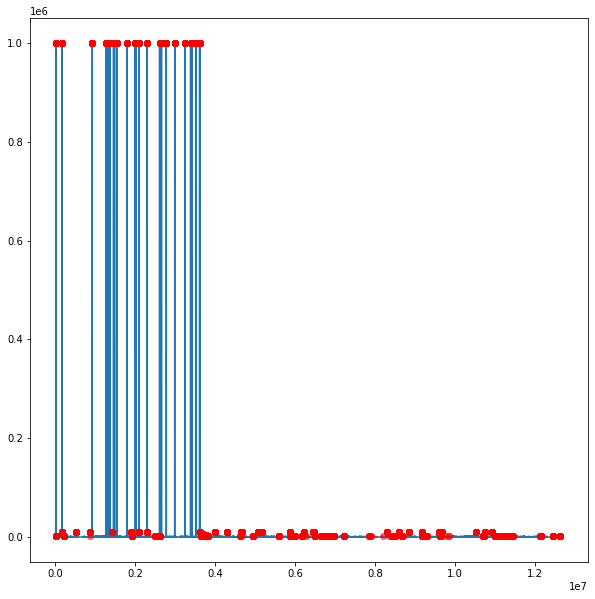

In [69]:
figsize = (10, 10)
kw = dict(marker='o', linestyle='none', color='r', alpha=0.3)

rates ['averate'] = filter_med(rates['individualrate'].values, threshold=5)

outlier_idx = np.where(rates['averate'].values != rates['individualrate'].values)[0]

fig1, ax1 = plt.subplots(figsize=figsize)
rates['individualrate'].plot()
rates['individualrate'][outlier_idx].plot(**kw)
plt.show()

# based on this graph let's try to clean the result

In [70]:
normal_rates = rates['individualrate'] < 9999

In [71]:
rate_final = rates[normal_rates]

In [72]:
rate_avg = rate_final.groupby(['statecode', 'businessyear'])['individualrate'].mean()
rate_avg = pd.DataFrame(rate_avg)
rate_avg.reset_index(inplace=True)  

# let's plot the rates

<AxesSubplot:xlabel='individualrate', ylabel='statecode'>

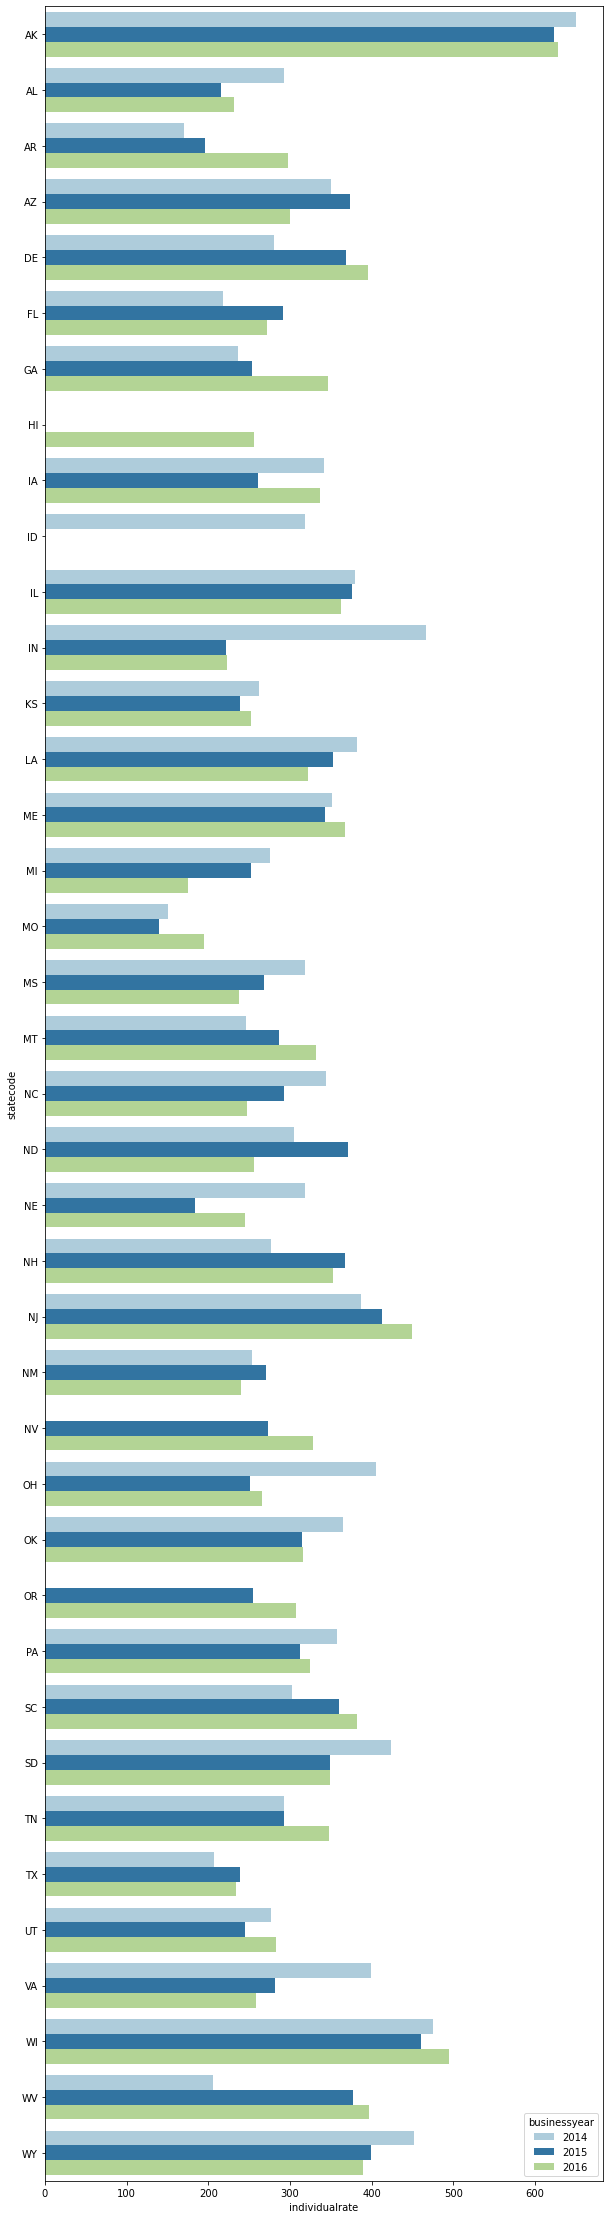

In [73]:
fig, ax = plt.subplots(figsize=(10, 40))
sns.barplot(ax=ax,y="statecode", x="individualrate", hue="businessyear", data=rate_avg, palette="Paired")